In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cvxpy as cp

sns.set()

## First, Load the Data

In [4]:
path_to_prices = r'C:\Users\Rafay\Documents\thesis\ActualWork\Data\results\prices.csv'
path_to_factors = r'C:\Users\Rafay\Documents\thesis\ActualWork\Data\results\3factors.csv'
prices = pd.read_csv(path_to_prices)
factors = pd.read_csv(path_to_factors)
assets_list = list(prices['symbol'].unique())
prices.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adjclose,splits,dividends
0,0,AMZN,2006-01-03,2.3735,2.3925,2.3125,2.3790,151644000,2.3790,0.0,0.0
1,1,AMZN,2006-01-04,2.3745,2.3865,2.3345,2.3625,148818000,2.3625,0.0,0.0
2,2,AMZN,2006-01-05,2.3580,2.4100,2.3555,2.3825,108344000,2.3825,0.0,0.0
3,3,AMZN,2006-01-06,2.3985,2.4290,2.3660,2.3935,123058000,2.3935,0.0,0.0
4,4,AMZN,2006-01-09,2.3275,2.3550,2.3200,2.3540,178862000,2.3540,0.0,0.0


In [5]:
pivot_prices = np.round(pd.pivot_table(prices, values='close', 
                                index='date', 
                                columns='symbol', 
                                aggfunc=np.mean),2)
pivot_prices = pivot_prices.reset_index()
pivot_prices['date'] = pd.to_datetime(pivot_prices['date'])
factors['date'] = pd.to_datetime(factors['Date'], format="%Y%m%d")

pivot_prices.head()

symbol,date,A,AAPL,ABB,ABT,ACN,ADBE,ADI,ADP,ADSK,...,WELL,WFC,WM,WMB,WPC,WTRG,WY,XEL,XOM,YUM
0,2006-01-03,23.96,2.67,10.19,18.98,29.30,38.52,36.70,36.74,42.75,...,34.55,31.90,30.67,19.48,25.74,22.05,66.64,18.57,58.47,16.80
1,2006-01-04,24.03,2.68,10.48,19.00,29.46,38.42,37.04,36.86,42.52,...,34.92,31.53,30.27,19.61,26.14,22.15,68.25,18.66,58.57,16.95
2,2006-01-05,24.66,2.66,10.55,19.25,29.68,38.07,38.22,36.55,41.87,...,35.64,31.50,30.39,19.40,27.20,22.31,67.65,18.65,58.28,17.67
3,2006-01-06,24.79,2.72,10.64,19.62,31.15,39.00,38.37,36.87,44.29,...,35.79,31.68,30.54,19.48,26.62,22.44,67.75,18.72,59.43,17.62
4,2006-01-09,24.71,2.72,10.95,20.35,31.06,38.38,38.91,36.77,43.64,...,36.30,31.67,31.04,19.79,27.00,22.50,67.59,18.67,59.40,17.76


In [6]:
pivot_prices = pivot_prices.set_index('date')
returns = pivot_prices.pct_change()
pivot_prices = pivot_prices.reset_index()
returns = returns.reset_index()
returns = returns.merge(factors, on='date', how='left')
returns = returns.drop(['Date'], axis=1)
returns = returns.dropna()
returns.describe()

,A,AAPL,ABB,ABT,ACN,ADBE,ADI,ADP,ADSK,AEE,...,WPC,WTRG,WY,XEL,XOM,YUM,Mkt-RF,SMB,HML,RF
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,...,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000
mean,0.000617,0.001254,0.000483,0.000558,0.000711,0.000904,0.000556,0.000519,0.000814,0.000212,...,0.000423,0.000321,0.000162,0.000415,0.000049,0.000648,0.030220,-0.005257,-0.011089,0.004483
std,0.019759,0.020795,0.020749,0.013860,0.016458,0.021275,0.019470,0.014627,0.024392,0.014647,...,0.017828,0.015733,0.024531,0.012631,0.016720,0.017376,1.051192,0.425688,0.414513,0.007001
min,-0.110117,-0.179039,-0.176218,-0.097857,-0.134543,-0.190346,-0.166149,-0.152526,-0.158599,-0.173750,...,-0.177856,-0.129066,-0.618934,-0.126918,-0.139525,-0.188261,-9.610000,-5.390000,-3.110000,0.000000
25%,-0.008193,-0.008296,-0.008518,-0.006159,-0.006860,-0.008508,-0.008628,-0.005821,-0.011073,-0.006411,...,-0.006701,-0.007085,-0.009605,-0.005654,-0.007461,-0.007099,-0.380000,-0.210000,-0.210000,0.000000
50%,0.000953,0.000809,0.000895,0.000395,0.000966,0.001173,0.000623,0.000764,0.001043,0.000582,...,0.000487,0.000767,0.000593,0.000557,0.000000,0.000632,0.080000,0.010000,-0.020000,0.000000
75%,0.010247,0.011663,0.010005,0.007652,0.008430,0.010885,0.009898,0.007501,0.012529,0.007422,...,0.007561,0.007984,0.010542,0.006963,0.007675,0.008395,0.510000,0.210000,0.180000,0.010000
max,0.138682,0.138728,0.219495,0.109360,0.163668,0.177193,0.156463,0.118576,0.161985,0.178014,...,0.206257,0.196295,0.253155,0.112577,0.171905,0.232484,9.200000,2.360000,4.160000,0.020000


In [7]:
'''
Inputs: AssetReturns: Pandas DataFrame, each date is a row, one column for each asset
        FactorReturn: Pandas DataFrame, each date is a row, one column for each factor
        Technique: Method through which parameters will be estimated. Default: OLS
Outputs: mu: numpy array, key: Symbol. value: return estimate
         Q: nxn Asset Covariance Matrix (n: # of assets)
'''
def GetParameterEstimates(AssetReturns, FactorReturns, technique='OLS', log=True):
    # Only have OLS implemented so far
    if technique!='OLS':
        return [], []
    
    AssetReturns_np = AssetReturns.to_numpy()
    FactorReturns_np = FactorReturns.to_numpy()
    T,n = AssetReturns_np.shape
    _, p = FactorReturns.shape

    # Get Data Matrix - Factors
    X = np.zeros((T, p+1))
    X[:,:-1] = np.ones((T,1)) # Add ones to first row
    X[:,1:] = FactorReturns

    # Get regression coefficients for Assets
    # B = (X^TX)^(-1)X^Ty
    B = np.matmul(np.linalg.inv((np.matmul(np.transpose(X), X))), (np.matmul(np.transpose(X), AssetReturns_np)))

    # Get alpha and betas
    a = np.transpose(B[0,:])
    V = B[1:(p+1),:]

    # Residual Variance to get D
    ep = AssetReturns_np - np.matmul(X, B)
    sigma_ep = 1/(T-p-1) * np.sum(np.square(ep), axis=0)
    D = np.diag(sigma_ep)

    # Get Factor Estimated Return and Covariance Matrix
    f_bar = np.transpose(np.mean(FactorReturns_np, axis=0))
    F = np.cov(FactorReturns_np, rowvar=False)

    # Get mu
    mu = a + np.matmul(np.transpose(V), f_bar)

    # Get Q
    Q = np.matmul(np.matmul(np.transpose(V), F), V) + D

    # Make sure Q is PSD
    w,v = np.linalg.eig(Q)
    min_eig = np.min(w)


    if min_eig<0:
        Q -= min_eig*np.identity(n)

    print(Q)
    
    if log:
        print("Shape of X: {}".format(X.shape))
        print("Shape of B: {}".format(B.shape))
        print("Shape of X*B: {}".format(np.matmul(X, B).shape))
        print("Shape of ep: {}".format(ep.shape))
        print("Shape of sigma_ep: {}".format(sigma_ep.shape))
        print("Shape of D: {}".format(sigma_ep.shape))
        print("Shape of Q: {}".format(Q.shape))
    
    return mu, Q


TypeError: GetParameterEstimates() missing 2 required positional arguments: 'AssetReturns' and 'FactorReturns'

In [56]:
'''
Mean Variance Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations
'''

def MVO(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)
    
    # Target Return for Constraint
    targetRet = np.mean(mu)
    
    constraints = [
        cp.sum(w) == 1, # Sum to 1
        mu.T @ w >= targetRet, # Target Return Constraint
        w>=0 # Disallow Short Sales
    ]

    # Objective Function
    risk = cp.quad_form(w, Q)

    prob = cp.Problem(cp.Minimize(risk), constraints=constraints)
    prob.solve()
    return w.value

'''
Risk Parity Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations
'''

def RP(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)

    # Kappa
    k = 2
          
    constraints = [
        w>=0 # Disallow Short Sales
    ]

    # Objective Function
    risk = cp.quad_form(w, Q)
    log_term = 0
    for i in range(n):
        log_term += cp.log(w[i])
    
    prob = cp.Problem(cp.Minimize(risk-(k*log_term)), constraints=constraints)
    
    # ECOS fails sometimes, if it does then do SCS
    try:
        prob.solve(verbose=False)
    except:
        prob.solve(solver='SCS',verbose=False)
    return w.value


'''
Distributionally Robust Risk Parity With Wasserstein Distance Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations

Formula:
    \min_{\boldsymbol{\phi} \in \mathcal{X}} {(\sqrt{\boldsymbol{\phi}^T \Sigma_{\mathcal{P}}(R)\boldsymbol{\phi}} + \sqrt{\delta}||\boldsymbol{\phi}||_p)^2} - c\sum_{i=1}^n ln(y)

'''
import math
def DRRPW(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)

    # Kappa
    k = 2

    # Size of uncertainty set
    delta = 0.05

    # Norm for x
    p = 2

    constraints = [
        w>=0 # Disallow Short Sales
    ]

    # risk = cp.quad_form(w, Q)

    log_term = 0
    for i in range(n):
        log_term += cp.log(w[i])
    
    # We need to compute \sqrt{x^T Q x} intelligently because
    # cvxpy does not compute well with the \sqrt

    # To do this, I will take the Cholesky decomposition
    # Q = LL^T
    # Then, take the 2-norm of L*x

    # Idea: (L_1 * x_1)^2 = Q_1 x_1

    L = np.linalg.cholesky(Q)

    obj = cp.power(cp.norm(L@w,2) + math.sqrt(delta)*cp.norm(w, p),2)
    obj = obj - k*log_term

    prob = cp.Problem(cp.Minimize(obj), constraints=constraints)
    
    # ECOS fails sometimes, if it does then do SCS
    try:
        prob.solve(verbose=False)
    except:
        prob.solve(solver='SCS',verbose=False)
    
    x = w.value
    x = np.divide(x, np.sum(x))
    
    # Check Risk Parity Condition is actually met
    risk_contrib = np.multiply(x, Q.dot(x))
    print(risk_contrib)
    print("DRRPW Worked? {}".format(np.all(np.isclose(risk_contrib, risk_contrib[0]))))

    return x


In [10]:
from datetime import datetime

def generate_date_list(data, start, end):
    start = datetime.fromisoformat(start)
    end = datetime.fromisoformat(end)

    # Train model from start_date to date
    mask = (data['date'] >= start) & (data['date'] <= end)
    data = data.loc[mask]
    return data.date.apply(lambda x: x.date()).unique().tolist()

In [34]:
from enum import Enum
class Optimizers(Enum):
    MVO = 1
    RP = 2
    DRRPW = 3
    
def GetOptimalAllocation(mu, Q, technique=Optimizers.MVO):
    if technique == Optimizers.MVO:
        return MVO(mu,Q)
    if technique == Optimizers.RP:
        return RP(mu, Q)
    if technique == Optimizers.DRRPW:
        return DRRPW(mu, Q)
    


In [57]:
from tqdm import tqdm
from functools import partial
tqdm = partial(tqdm, position=0, leave=True)

date = '2017-06-12'
assets_list_cleaned = [x for x in assets_list if str(x) != 'nan']
holdings = pd.DataFrame(columns=['date']+assets_list_cleaned)
portVal = pd.DataFrame(columns=['date', 'Wealth'])
factors = ['Mkt-RF', 'SMB', 'HML']
InitialValue = 1000000 # $1,000,000
lookback = 30 # Number of days preceeding current date to train

opt_type = Optimizers.DRRPW

dates = generate_date_list(returns, start='2007-01-01', end='2007-01-10')
first = True
for date in tqdm(dates):
    # Get Asset Prices for Today
    currentPrices = (pivot_prices[pivot_prices['date']==str(date)]
        .drop('date',axis=1)
        .values
        .flatten())
    
    # Update Portfolio Value
    if first:
        portVal.loc[len(portVal)] = [date] + [InitialValue]
        CurrentPortfolioValue = InitialValue
        first = False
    else:     
        CurrentPortfolioValue = np.dot(currentPrices,noShares)
        portVal.loc[len(portVal)] = [date] + [CurrentPortfolioValue]
        
    # We don't want the current date information, hence the lack of equality
    # Get last 30
    date = str(date)
    
    returns_lastn = returns[(returns['date'] < date)].tail(lookback)
    factor_returns = returns_lastn[factors]
    asset_returns = returns_lastn.drop(factors + ['date', 'RF'], axis=1)

    mu, Q = GetParameterEstimates(asset_returns, factor_returns, log=False)
    
    x = GetOptimalAllocation(mu, Q, opt_type)

    # Update Holdings
    holdings.loc[len(holdings)] = [date] + list(x)

    # Update shares held
    # 50% of 100k = 50k. If price is 100 we have 50,000/100=50 shares
    noShares = np.divide(x*CurrentPortfolioValue, currentPrices)
    print('Done {}'.format(date))
portVal['date'] = pd.to_datetime(portVal['date'])
portVal.merge(returns[['date','RF']], how='left', on='date')


  0%|          | 0/6 [00:00<?, ?it/s]

[[1.31563924e-04 4.78923376e-06 3.36168943e-05 ... 1.72207348e-05
  2.24191911e-05 2.68483760e-05]
 [4.78923376e-06 3.85101982e-04 2.40320162e-05 ... 2.00440514e-06
  1.09435614e-05 3.71502250e-05]
 [3.36168943e-05 2.40320162e-05 1.39812229e-04 ... 2.69702181e-05
  4.42076950e-05 4.98815308e-05]
 ...
 [1.72207348e-05 2.00440514e-06 2.69702181e-05 ... 3.35858421e-05
  1.93967023e-05 1.94395908e-05]
 [2.24191911e-05 1.09435614e-05 4.42076950e-05 ... 1.93967023e-05
  2.09528724e-04 3.25638684e-05]
 [2.68483760e-05 3.71502250e-05 4.98815308e-05 ... 1.94395908e-05
  3.25638684e-05 1.89101937e-04]]


 17%|█▋        | 1/6 [00:00<00:03,  1.54it/s]

[ 4.34352251e-08  5.70963040e-08  5.76752294e-08  6.04068975e-08
  5.97026745e-08  1.03834304e-07  7.26707142e-08  5.24397328e-08
  7.83586057e-08  2.13319959e-08  4.66876402e-08  7.67480608e-08
  9.89623022e-08  1.88763303e-07  9.15125691e-08  3.49136650e-08
  9.00993926e-08  1.01495903e-07  1.34850939e-07  1.17530226e-07
  1.11521051e-07  4.89550574e-08  1.25089327e-07  9.95518287e-08
  1.08386736e-07  7.06143566e-08  8.70587256e-08  2.16703342e-08
  8.06418921e-08  2.06807937e-08  8.12277577e-08  1.03094535e-07
  1.58331232e-07  6.86407486e-08  4.10197133e-08  4.52757781e-08
  1.02005404e-07  8.99759770e-08  9.53620967e-08  6.85853266e-08
  1.56417297e-07  7.13878642e-08  1.32995427e-07  8.67997847e-08
  1.64807402e-07  1.18595289e-07  1.48180163e-08  7.96714772e-08
  8.70556393e-08  8.06161038e-08  1.13738084e-07  6.70971720e-08
  8.80976252e-08  1.07390830e-07  1.36889042e-07  1.37014545e-07
  1.64945616e-07  1.66426074e-07  7.77261144e-08  1.29704742e-07
  1.37620603e-07  1.07678

 33%|███▎      | 2/6 [00:01<00:02,  1.56it/s]

[ 4.54080111e-08  5.94104846e-08  6.02929046e-08  6.02497093e-08
  6.89182168e-08  1.18968942e-07  7.32249414e-08  5.94430572e-08
  7.79203586e-08  1.78387624e-08  4.27501994e-08  7.78646865e-08
  9.31516739e-08  2.04985219e-07  9.33400432e-08  2.84971464e-08
  7.61983554e-08  1.10482494e-07  1.14283186e-07  1.13771381e-07
  1.14028596e-07  4.06174869e-08  1.29217614e-07  9.83153576e-08
  9.86498979e-08  4.84109104e-08  8.13088448e-08  2.29595093e-08
  7.39709396e-08  3.34465130e-08  7.69097496e-08  9.63414630e-08
  1.81077448e-07  5.08229480e-08  4.00651792e-08  5.72010679e-08
  1.13845157e-07  9.60496447e-08  9.32955344e-08  7.17882862e-08
  1.43827930e-07  8.71200011e-08  1.17852081e-07  8.62234428e-08
  1.61038023e-07  1.12122035e-07  9.32610295e-09  7.70569627e-08
  6.55826594e-08  1.50958124e-07  1.54680454e-07  6.39591419e-08
  6.86397488e-08  1.09646468e-07  1.37355058e-07  1.20275259e-07
  1.81053893e-07  1.54372917e-07  5.59784209e-08  1.69942911e-07
  1.36361927e-07  1.35389

 50%|█████     | 3/6 [00:01<00:01,  1.66it/s]

[ 4.50812099e-08  5.94479322e-08  6.66102333e-08  5.82188792e-08
  6.31463648e-08  1.07047910e-07  6.75943328e-08  5.50160357e-08
  7.77476016e-08  1.94924836e-08  4.06449950e-08  7.77086596e-08
  9.24068408e-08  2.02915488e-07  9.20519489e-08  1.74784465e-08
  7.32086459e-08  1.06090479e-07  1.05588253e-07  1.07363416e-07
  1.11153096e-07  4.10403898e-08  1.21330524e-07  1.01749678e-07
  9.04493013e-08  4.51141470e-08  8.01855969e-08  1.77394264e-08
  7.45330815e-08  3.20897431e-08  7.76051187e-08  9.03322400e-08
  1.91512747e-07  5.07108912e-08  3.85177775e-08  5.92777076e-08
  1.08745253e-07  9.50170384e-08  9.26017710e-08  7.16696916e-08
  1.41689789e-07  8.60805348e-08  1.16679984e-07  9.07466728e-08
  1.57930030e-07  1.13230403e-07  1.07081700e-08  7.92796484e-08
  5.97541983e-08  1.67055140e-07  1.66736869e-07  6.63447535e-08
  6.25686174e-08  1.10368562e-07  1.20705432e-07  1.10089630e-07
  1.80133629e-07  1.41974687e-07  5.45250121e-08  1.81762322e-07
  1.27717069e-07  1.38499

 67%|██████▋   | 4/6 [00:02<00:01,  1.70it/s]

[ 4.74951186e-08  6.53154072e-08  7.27209171e-08  6.24781606e-08
  7.55042399e-08  1.13076738e-07  7.75656953e-08  5.80651196e-08
  7.45434251e-08  3.36296637e-08  5.93435557e-08  1.01813851e-07
  1.04732286e-07  2.10890851e-07  1.11727492e-07  9.56527910e-09
  8.56181097e-08  1.22547965e-07  1.26009529e-07  1.36798613e-07
  1.20472818e-07  6.56976783e-08  1.54362694e-07  1.16881422e-07
  8.61710811e-08  5.24580742e-08  8.26552729e-08  2.62204871e-08
  7.47099058e-08  3.97608126e-08  8.85685751e-08  1.09278767e-07
  2.06463660e-07  5.73392857e-08  6.29186012e-08  6.06001292e-08
  1.13770524e-07  1.01312814e-07  1.11548713e-07  8.20640414e-08
  1.53712287e-07  8.57706330e-08  1.17304053e-07  1.11039661e-07
  1.84600661e-07  1.38167054e-07  2.21600810e-08  9.61396996e-08
  8.68346126e-08  1.65410899e-07  1.48343574e-07  6.98885211e-08
  7.66414807e-08  1.47537066e-07  5.71087023e-08  1.11635918e-07
  2.12104631e-07  1.70778958e-07  5.01687480e-08  1.80801471e-07
  1.17056486e-07  1.39834

 83%|████████▎ | 5/6 [00:03<00:00,  1.68it/s]

[ 4.73982851e-08  6.02807022e-08  7.34704818e-08  6.20802239e-08
  7.70683868e-08  1.03086346e-07  7.69205769e-08  5.91089614e-08
  7.38633317e-08  3.40119295e-08  5.76390753e-08  8.98379282e-08
  1.06624688e-07  2.10602584e-07  1.11998608e-07  6.84411107e-09
  8.13965986e-08  1.18612875e-07  1.13851926e-07  1.27936625e-07
  1.17451489e-07  6.73608687e-08  1.47656774e-07  1.16535645e-07
  8.58471829e-08  5.21601577e-08  7.16236337e-08  2.79990630e-08
  7.15853967e-08  4.74970495e-08  9.01061969e-08  1.05600994e-07
  1.99771540e-07  5.75922639e-08  6.37709874e-08  5.35677758e-08
  1.07924902e-07  1.02095018e-07  1.00396214e-07  8.29563734e-08
  1.24928099e-07  8.08141502e-08  1.17282010e-07  1.08556600e-07
  1.79483572e-07  1.35825961e-07  2.41244042e-08  9.61090529e-08
  8.49768700e-08  1.53970786e-07  1.37564190e-07  6.32033944e-08
  7.78434648e-08  1.34271297e-07  5.38216561e-08  1.14561852e-07
  2.11995251e-07  1.68291894e-07  4.88002159e-08  1.77898540e-07
  1.22214868e-07  1.33987

100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

[ 4.88674734e-08  7.72647487e-08  7.53637559e-08  6.36023810e-08
  8.55572966e-08  1.18439887e-07  7.58140032e-08  5.91625043e-08
  7.63926135e-08  3.40945242e-08  6.39223440e-08  9.81270435e-08
  1.11340838e-07  2.14419191e-07  1.06985168e-07  1.85810682e-08
  9.50871647e-08  1.15320418e-07  1.36488508e-07  1.45803077e-07
  1.12732599e-07  9.17366174e-08  1.65215606e-07  1.23101735e-07
  9.45594526e-08  5.36370697e-08  9.01789675e-08  1.88058404e-08
  7.60551462e-08  2.29166174e-08  6.72368464e-08  1.15656187e-07
  2.11347643e-07  5.31601368e-08  5.83975197e-08  6.21007279e-08
  1.26218940e-07  1.03008867e-07  1.00685657e-07  8.12421850e-08
  1.55482184e-07  8.84177622e-08  1.26307469e-07  1.08573153e-07
  1.81034074e-07  1.55125326e-07  5.33461422e-08  9.22648830e-08
  9.48234304e-08  1.97367150e-07  1.54680220e-07  7.10396294e-08
  8.33179751e-08  1.62713820e-07  7.24921289e-08  1.30189555e-07
  2.34738935e-07  1.68087856e-07  6.17577867e-08  1.94071973e-07
  1.48748169e-07  1.59634

,date,Wealth,RF
0,2007-01-03,1.000000e+06,0.02
1,2007-01-04,1.000798e+06,0.02
2,2007-01-05,9.919806e+05,0.02
3,2007-01-08,9.930740e+05,0.02
4,2007-01-09,9.933474e+05,0.02
5,2007-01-10,9.954815e+05,0.02


In [51]:
holdings

,date,AMZN,HD,TM,MCD,NKE,LOW,SBUX,BKNG,TJX,...,ELP,CNP,BEP,CMS,AES,ATO,EVRG,LNT,WTRG,NI
0,2007-01-03,1.923069,2.712704,1.321889,2.151408,3.212423,3.228870,2.447835,2.884646,3.514125,...,4.058179,4.124906,4.062925,4.072574,4.133054,4.036624,3.980036,4.119270,3.995834,4.005039
1,2007-01-04,1.725231,2.565024,1.339813,2.288276,3.047696,3.079023,2.544255,2.739494,3.555722,...,4.063740,4.127882,4.066785,4.063093,4.139653,4.043266,3.992298,4.118638,3.978734,4.011752
2,2007-01-05,1.731968,2.597642,1.423099,2.357270,3.065015,3.060634,2.513827,2.659204,2.784080,...,4.059133,4.119898,4.057457,4.052328,4.127765,4.039403,3.977274,4.109724,3.959183,4.004512
3,2007-01-08,1.637568,2.374158,1.298057,2.487065,3.052702,3.164896,2.393912,2.771074,2.917802,...,4.081401,4.123122,4.059869,4.066390,4.118223,4.051889,3.979498,4.103184,3.979371,4.014192
4,2007-01-09,1.639689,2.517622,1.328415,2.423933,3.041770,3.274884,2.254667,2.825647,3.010614,...,4.087442,4.130873,4.064754,4.079931,4.131099,4.057510,3.981837,4.110110,3.989267,4.019430
5,2007-01-10,1.448695,2.683145,1.407059,2.210647,2.641137,3.032799,2.288186,2.856005,2.622990,...,4.078771,4.120479,4.054182,4.063310,4.133277,4.052414,3.971711,4.102261,3.977621,4.019063


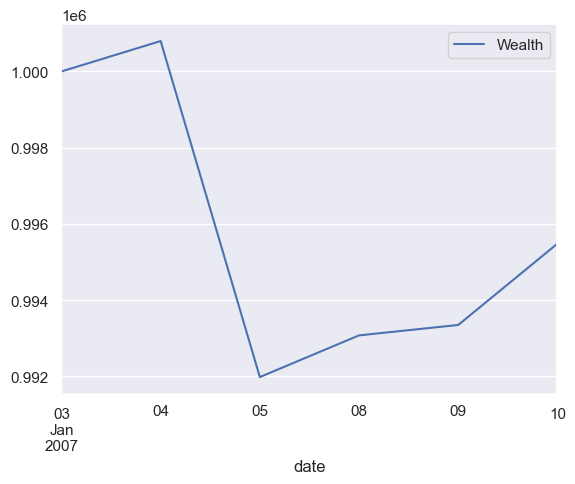

In [55]:
portVal.plot(x='date', y='Wealth')
plt.savefig('test.png')

In [27]:
portVal2 = portVal
portVal2['date'] = pd.to_datetime(portVal2['date'])
portVal2 = portVal2.merge(returns[['date','RF']], how='left', on='date')
portVal2['RF'] = portVal2['RF']/365 # Annual risk free rate
portVal2['ret'] = portVal2['Wealth'].pct_change()
portVal2['ExcessRet'] = portVal2['ret'] - portVal2['RF']
SR = portVal2['ExcessRet'].mean()/portVal2['ExcessRet'].std()


-0.3133906609289943

In [ ]:
def calculateSharpe(portVal):
    portVal['RF'] = portVal['RF']/365 # Annual risk free rate
    portVal['ret'] = portVal['Wealth'].pct_change()
    portVal['ExcessRet'] = portVal['ret'] - portVal['RF']
    SR = portVal['ExcessRet'].mean()/portVal['ExcessRet'].std()

    return SR


def plotWealth(holdings):
    print(holdings.head())

def plotHoldings(holdings):
    pass


In [ ]:
TODO:
1. Write Risk Parity solver in CVXOPT
2. Write the new Dist. Robust RP in CVXOPT
3. Figure out how to use cvxpylayers
4. Make wealth, SR and holdings graphs code

C:\Users\Rafay\AppData\Local\Temp\ipykernel_19260\3636925383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  [x for x in list(round(holdings.sum(axis=1),3)) if x!=1.0]


[]

In [ ]:
from enum import Enum
class Optimizers(Enum):
    MVO = 1
    RP = 2

In [ ]:
Optimizers.MVO

<Optimizers.MVO: 1>